In [ ]:
from keras import layers
from keras.models import Sequential

In [ ]:
# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters, a 3x3 kernel, and ReLU activation function
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                        

In [ ]:
# Compile the model
from keras import optimizers

model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=["acc"])

In [ ]:
##########################
# Data Generator
##########################
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [ ]:
# paths to the train and validation directories
train_path = "./data/catdog/train"
validation_path = "./data/catdog/validation"

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path, target_size=(150, 150), batch_size=20, class_mode="binary"
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path, target_size=(150, 150), batch_size=20, class_mode="binary"
)

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
##########################
# Fit the model
##########################
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50,
)

Epoch 1/20
100/100 [==============================] - 46s 453ms/step - loss: 0.6854 - acc: 0.5398 - val_loss: 0.6641 - val_acc: 0.5950
Epoch 2/20
100/100 [==============================] - 44s 442ms/step - loss: 0.6434 - acc: 0.6363 - val_loss: 0.6448 - val_acc: 0.5940
Epoch 3/20
100/100 [==============================] - 39s 393ms/step - loss: 0.5938 - acc: 0.6843 - val_loss: 0.6041 - val_acc: 0.6700
Epoch 4/20
100/100 [==============================] - 38s 377ms/step - loss: 0.5607 - acc: 0.7164 - val_loss: 0.6355 - val_acc: 0.6370
Epoch 5/20
100/100 [==============================] - 38s 377ms/step - loss: 0.5359 - acc: 0.7324 - val_loss: 0.5882 - val_acc: 0.6780
Epoch 6/20
100/100 [==============================] - 38s 378ms/step - loss: 0.5121 - acc: 0.7414 - val_loss: 0.5622 - val_acc: 0.6990
Epoch 7/20
100/100 [==============================] - 38s 378ms/step - loss: 0.4961 - acc: 0.7669 - val_loss: 0.5494 - val_acc: 0.7110
Epoch 8/20
100/100 [==============================] - 3

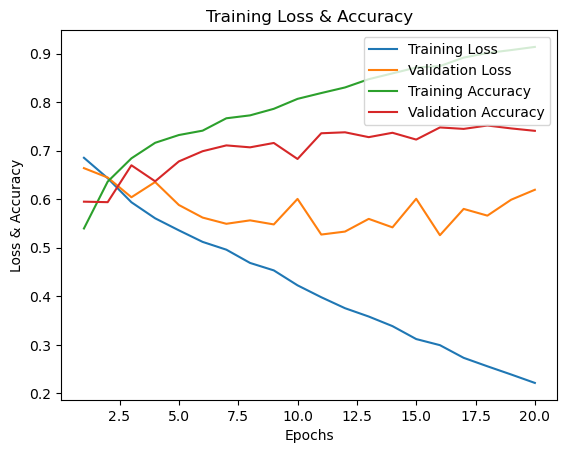

In [ ]:
##########################
# Plot the results
##########################
import matplotlib.pyplot as plt

epochs = np.arange(1, 21)

plt.plot(epochs, history.history["loss"], label="Training Loss")
plt.plot(epochs, history.history["val_loss"], label="Validation Loss")

plt.plot(epochs, history.history["acc"], label="Training Accuracy")
plt.plot(epochs, history.history["val_acc"], label="Validation Accuracy")

plt.title("Training Loss & Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss & Accuracy")

plt.legend(loc="upper right")
plt.show()

In [ ]:
##########################
# 1. Creating new model
##########################

second_model = Sequential()

# Add a Conv2D layer with 32 filters, a 3x3 kernel, and ReLU activation function
second_model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
second_model.add(layers.MaxPooling2D((2, 2)))

second_model.add(layers.Conv2D(64, (3, 3), activation="relu"))
second_model.add(layers.MaxPooling2D((2, 2)))

second_model.add(layers.Conv2D(128, (3, 3), activation="relu"))
second_model.add(layers.MaxPooling2D((2, 2)))

second_model.add(layers.Conv2D(128, (3, 3), activation="relu"))
second_model.add(layers.MaxPooling2D((2, 2)))

second_model.add(layers.Flatten())
second_model.add(layers.Dropout(0.5))

second_model.add(layers.Dense(512, activation="relu"))
second_model.add(layers.Dense(1, activation="sigmoid"))

second_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)       

In [ ]:
##########################
# Compile the new model
##########################
second_model.compile(
    loss="binary_crossentropy",
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=["acc"],
)

In [ ]:
##########################
# 2. Data Augmentation
##########################

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path, target_size=(150, 150), batch_size=16, class_mode="binary"
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path, target_size=(150, 150), batch_size=16, class_mode="binary"
)

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
##########################
# Fit the new model
##########################

second_history = second_model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
)
print(f"info: Done!\n {second_history.history}")

Epoch 1/100
100/100 [==============================] - 41s 402ms/step - loss: 0.6978 - acc: 0.4906 - val_loss: 0.6886 - val_acc: 0.5150
Epoch 2/100
100/100 [==============================] - 34s 336ms/step - loss: 0.6935 - acc: 0.5178 - val_loss: 0.6860 - val_acc: 0.4988
Epoch 3/100
100/100 [==============================] - 33s 333ms/step - loss: 0.6873 - acc: 0.5410 - val_loss: 0.6825 - val_acc: 0.5200
Epoch 4/100
100/100 [==============================] - 34s 338ms/step - loss: 0.6837 - acc: 0.5494 - val_loss: 0.7073 - val_acc: 0.4988
Epoch 5/100
100/100 [==============================] - 32s 322ms/step - loss: 0.6715 - acc: 0.5885 - val_loss: 0.6809 - val_acc: 0.5600
Epoch 6/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6734 - acc: 0.5888 - val_loss: 0.6526 - val_acc: 0.6162
Epoch 7/100
100/100 [==============================] - 32s 318ms/step - loss: 0.6698 - acc: 0.5997 - val_loss: 0.6708 - val_acc: 0.5863
Epoch 8/100
100/100 [===========================

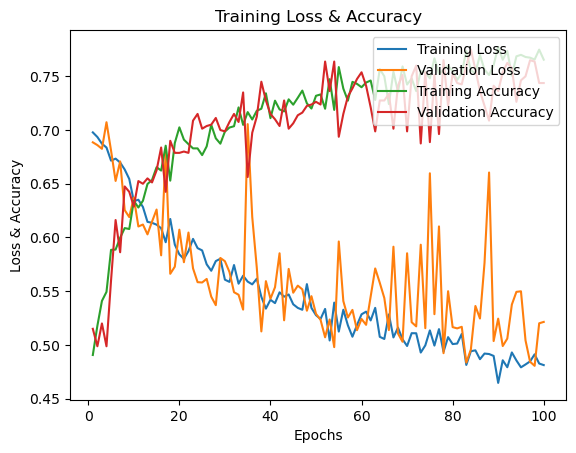

In [ ]:
##########################
# Plot the results
##########################
epochs = np.arange(1, 101)

plt.plot(epochs, second_history.history["loss"], label="Training Loss")
plt.plot(epochs, second_history.history["val_loss"], label="Validation Loss")

plt.plot(epochs, second_history.history["acc"], label="Training Accuracy")
plt.plot(epochs, second_history.history["val_acc"], label="Validation Accuracy")

plt.title("Training Loss & Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss & Accuracy")

plt.legend(loc="upper right")
plt.show()

In [ ]:
##########################
# Save the models
##########################
model.save("./models/cat_dog_model.h5")
second_model.save("./models/cat_dog_model_v2.h5")

In [ ]:
##########################

In [ ]:
##########################
# Predictions
##########################

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
model_path = "./models/cat_dog_model_v2.h5"
img_path = "./data/catdog/test/dogs/1513.jpg"

prediction_model = load_model(model_path)
test_img = load_img(img_path, target_size=(150, 150))

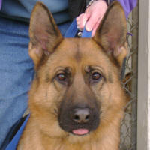

In [ ]:
test_img

In [ ]:
# learning labels
labels = train_generator.class_indices
print(f"info: Labels: {labels}")

info: Labels: {'cats': 0, 'dogs': 1}


In [ ]:
# Load the model
model_path = "./models/cat_dog_model_v2.h5"
img_path = f"./data/catdog/test/{random_choice}/{np.random.randint(1500,2000)}.jpg"

prediction_model = load_model(model_path)
test_img = load_img(img_path, target_size=(150, 150))

# Convert the image to an array
test_img_array = img_to_array(test_img)
test_img_array = np.expand_dims(test_img_array, axis=0)

prediction = prediction_model.predict(test_img_array)
print(f"info: Prediction: {prediction}")

if prediction < 0.5:
    random_choice = "Cat"
else:
    random_choice = "Dog"


# putting labels on the image
import cv2 as cv

test_img = cv.imread(img_path)
cv.putText(
    test_img,
    f"Prediction: {random_choice}",
    (10, 30),
    cv.FONT_HERSHEY_SIMPLEX,
    1,
    (0, 255, 0),
    2,
    cv.LINE_AA,
)
cv.imshow("Prediction", test_img)
cv.waitKey(0)
cv.destroyAllWindows()